In [1]:
import argparse
import sys
import os
import time
import datetime
import ast
from collections import Counter
from pathlib import Path
import hydra

import numpy as np
import torch

# Ensure local src/ is importable
sys.path.insert(0, str(Path(os.getcwd()).parent / "src"))

from my_genQC.inference.eval_metrics import UnitaryFrobeniusNorm, UnitaryInfidelityNorm
from my_genQC.inference.evaluation_helper import get_unitaries, get_srvs
from my_genQC.inference.sampling import generate_compilation_tensors, generate_tensors, decode_tensors_to_backend
from my_genQC.pipeline.diffusion_pipeline import DiffusionPipeline
from my_genQC.platform.simulation import Simulator, CircuitBackendType
from my_genQC.platform.tokenizer.circuits_tokenizer import CircuitTokenizer
from my_genQC.utils.misc_utils import infer_torch_device, get_entanglement_bins
from my_genQC.dataset import circuits_dataset
from my_genQC.models.config_model import ConfigModel
from my_genQC.utils.config_loader import load_config, store_tensor, load_tensor

from quantum_diffusion.data.dataset import DatasetLoader
from quantum_diffusion.evaluation.evaluator import SRVEvaluator

In [2]:
# Config loading
with hydra.initialize(version_base=None, config_path="../conf"):
    cfg = hydra.compose(config_name="config.yaml", overrides=["evaluation=remote_model"])
    cfg = cfg["evaluation"]

In [3]:
cfg.wandb.enable = False

In [4]:
acc_by_qubits = {num_qubits: None for num_qubits in range(3, 9)}

for num_qubits in acc_by_qubits.keys():
        
    cfg.dataset = f"../datasets/paper_quditkit/srv_{num_qubits}q_dataset"
    
    evaluator = SRVEvaluator(config=cfg)
    srv_exact_match_rate, acc_per_entanglement = evaluator.evaluate()
    acc_by_qubits[num_qubits] = acc_per_entanglement

[INFO]: Cuda device has a capability of 8.6 (>= 8), allowing tf32 matmul.
2026-01-05 20:55:01 - quantum_diffusion.evaluation.evaluator - INFO - Running w/o wandb
2026-01-05 20:55:01 - quantum_diffusion.data.dataset - INFO - Detected preprocessed dataset. Loading directly...
[INFO]: Loading tensor from `../datasets/paper_quditkit/srv_3q_dataset/dataset/ds_x.safetensors` onto device: cuda.
[INFO]: Loading tensor from `../datasets/paper_quditkit/srv_3q_dataset/dataset/ds_y.safetensors` onto device: cuda.
[INFO]: Instantiated config_dataset from given config on cuda.
2026-01-05 20:55:01 - quantum_diffusion.data.dataset - INFO - Dataset loaded from ../datasets/paper_quditkit/srv_3q_dataset


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO]: `genQC.models.unet_qc.QC_Cond_UNet` instantiated from given `config` on cuda.
[INFO]: Loading model from `/root/.cache/huggingface/hub/models--Floki00--qc_srv_3to8qubit/snapshots/18eece95eb50483c46dd4eef1cdac3e09afadd54/model.pt` onto device: cuda.
[INFO]: `genQC.models.unet_qc.QC_Cond_UNet`. Freeze model: True
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder` instantiated from given `config` on cuda.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Found no key `save_type` in `config`. No state dict loaded.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Freeze model: True
[WARNING]: The value 0 is reserved for background tokens, i.e. qubit time position which are not effected by gates.
[WARNING]: Automatically incrementing all vocabulary values by one ...
2026-01-05 20:55:05 - quantum_diffusion.evaluation.evaluator - INFO - Starting tensor generation...


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[INFO]: (generate_comp_tensors) Generated 10000 tensors
2026-01-05 20:55:33 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor generation. Took 27.80 seconds.
2026-01-05 20:55:33 - quantum_diffusion.evaluation.evaluator - INFO - Decoding tensors...
2026-01-05 20:55:40 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor decoding. Took 6.83 seconds.
2026-01-05 20:55:40 - quantum_diffusion.evaluation.evaluator - INFO - ==== genQC Evaluation ====
2026-01-05 20:55:40 - quantum_diffusion.evaluation.evaluator - INFO - Samples requested: 10000
2026-01-05 20:55:40 - quantum_diffusion.evaluation.evaluator - INFO - Decoded circuits : 9958
2026-01-05 20:55:40 - quantum_diffusion.evaluation.evaluator - INFO - Decode failures  : 42
2026-01-05 20:55:40 - quantum_diffusion.evaluation.evaluator - INFO - Calculating SRVs...
2026-01-05 20:55:44 - quantum_diffusion.evaluation.evaluator - INFO - Finished SRV calculation. Took 4.13 seconds.
2026-01-05 20:55:44 - quantum_diffusio

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO]: `genQC.models.unet_qc.QC_Cond_UNet` instantiated from given `config` on cuda.
[INFO]: Loading model from `/root/.cache/huggingface/hub/models--Floki00--qc_srv_3to8qubit/snapshots/18eece95eb50483c46dd4eef1cdac3e09afadd54/model.pt` onto device: cuda.
[INFO]: `genQC.models.unet_qc.QC_Cond_UNet`. Freeze model: True
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder` instantiated from given `config` on cuda.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Found no key `save_type` in `config`. No state dict loaded.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Freeze model: True
[WARNING]: The value 0 is reserved for background tokens, i.e. qubit time position which are not effected by gates.
[WARNING]: Automatically incrementing all vocabulary values by one ...
2026-01-05 20:55:47 - quantum_diffusion.evaluation.evaluator - INFO - Starting tensor generation...


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[INFO]: (generate_comp_tensors) Generated 10000 tensors
2026-01-05 20:56:19 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor generation. Took 31.86 seconds.
2026-01-05 20:56:19 - quantum_diffusion.evaluation.evaluator - INFO - Decoding tensors...
2026-01-05 20:56:26 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor decoding. Took 6.64 seconds.
2026-01-05 20:56:26 - quantum_diffusion.evaluation.evaluator - INFO - ==== genQC Evaluation ====
2026-01-05 20:56:26 - quantum_diffusion.evaluation.evaluator - INFO - Samples requested: 10000
2026-01-05 20:56:26 - quantum_diffusion.evaluation.evaluator - INFO - Decoded circuits : 9942
2026-01-05 20:56:26 - quantum_diffusion.evaluation.evaluator - INFO - Decode failures  : 58
2026-01-05 20:56:26 - quantum_diffusion.evaluation.evaluator - INFO - Calculating SRVs...
2026-01-05 20:56:33 - quantum_diffusion.evaluation.evaluator - INFO - Finished SRV calculation. Took 6.80 seconds.
2026-01-05 20:56:33 - quantum_diffusio

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO]: `genQC.models.unet_qc.QC_Cond_UNet` instantiated from given `config` on cuda.
[INFO]: Loading model from `/root/.cache/huggingface/hub/models--Floki00--qc_srv_3to8qubit/snapshots/18eece95eb50483c46dd4eef1cdac3e09afadd54/model.pt` onto device: cuda.
[INFO]: `genQC.models.unet_qc.QC_Cond_UNet`. Freeze model: True
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder` instantiated from given `config` on cuda.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Found no key `save_type` in `config`. No state dict loaded.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Freeze model: True
[WARNING]: The value 0 is reserved for background tokens, i.e. qubit time position which are not effected by gates.
[WARNING]: Automatically incrementing all vocabulary values by one ...
2026-01-05 20:56:36 - quantum_diffusion.evaluation.evaluator - INFO - Starting tensor generation...


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[INFO]: (generate_comp_tensors) Generated 10000 tensors
2026-01-05 20:57:15 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor generation. Took 39.39 seconds.
2026-01-05 20:57:15 - quantum_diffusion.evaluation.evaluator - INFO - Decoding tensors...
2026-01-05 20:57:22 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor decoding. Took 6.49 seconds.
2026-01-05 20:57:22 - quantum_diffusion.evaluation.evaluator - INFO - ==== genQC Evaluation ====
2026-01-05 20:57:22 - quantum_diffusion.evaluation.evaluator - INFO - Samples requested: 10000
2026-01-05 20:57:22 - quantum_diffusion.evaluation.evaluator - INFO - Decoded circuits : 9963
2026-01-05 20:57:22 - quantum_diffusion.evaluation.evaluator - INFO - Decode failures  : 37
2026-01-05 20:57:22 - quantum_diffusion.evaluation.evaluator - INFO - Calculating SRVs...
2026-01-05 20:57:33 - quantum_diffusion.evaluation.evaluator - INFO - Finished SRV calculation. Took 11.16 seconds.
2026-01-05 20:57:33 - quantum_diffusi

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO]: `genQC.models.unet_qc.QC_Cond_UNet` instantiated from given `config` on cuda.
[INFO]: Loading model from `/root/.cache/huggingface/hub/models--Floki00--qc_srv_3to8qubit/snapshots/18eece95eb50483c46dd4eef1cdac3e09afadd54/model.pt` onto device: cuda.
[INFO]: `genQC.models.unet_qc.QC_Cond_UNet`. Freeze model: True
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder` instantiated from given `config` on cuda.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Found no key `save_type` in `config`. No state dict loaded.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Freeze model: True
[WARNING]: The value 0 is reserved for background tokens, i.e. qubit time position which are not effected by gates.
[WARNING]: Automatically incrementing all vocabulary values by one ...
2026-01-05 20:57:37 - quantum_diffusion.evaluation.evaluator - INFO - Starting tensor generation...


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[INFO]: (generate_comp_tensors) Generated 10000 tensors
2026-01-05 20:58:20 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor generation. Took 43.36 seconds.
2026-01-05 20:58:20 - quantum_diffusion.evaluation.evaluator - INFO - Decoding tensors...
2026-01-05 20:58:27 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor decoding. Took 7.20 seconds.
2026-01-05 20:58:27 - quantum_diffusion.evaluation.evaluator - INFO - ==== genQC Evaluation ====
2026-01-05 20:58:27 - quantum_diffusion.evaluation.evaluator - INFO - Samples requested: 10000
2026-01-05 20:58:27 - quantum_diffusion.evaluation.evaluator - INFO - Decoded circuits : 9955
2026-01-05 20:58:27 - quantum_diffusion.evaluation.evaluator - INFO - Decode failures  : 45
2026-01-05 20:58:27 - quantum_diffusion.evaluation.evaluator - INFO - Calculating SRVs...
2026-01-05 20:58:45 - quantum_diffusion.evaluation.evaluator - INFO - Finished SRV calculation. Took 17.07 seconds.
2026-01-05 20:58:45 - quantum_diffusi

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO]: `genQC.models.unet_qc.QC_Cond_UNet` instantiated from given `config` on cuda.
[INFO]: Loading model from `/root/.cache/huggingface/hub/models--Floki00--qc_srv_3to8qubit/snapshots/18eece95eb50483c46dd4eef1cdac3e09afadd54/model.pt` onto device: cuda.
[INFO]: `genQC.models.unet_qc.QC_Cond_UNet`. Freeze model: True
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder` instantiated from given `config` on cuda.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Found no key `save_type` in `config`. No state dict loaded.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Freeze model: True
[WARNING]: The value 0 is reserved for background tokens, i.e. qubit time position which are not effected by gates.
[WARNING]: Automatically incrementing all vocabulary values by one ...
2026-01-05 20:58:49 - quantum_diffusion.evaluation.evaluator - INFO - Starting tensor generation...


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[INFO]: (generate_comp_tensors) Generated 10000 tensors
2026-01-05 20:59:36 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor generation. Took 47.43 seconds.
2026-01-05 20:59:36 - quantum_diffusion.evaluation.evaluator - INFO - Decoding tensors...
2026-01-05 20:59:43 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor decoding. Took 7.41 seconds.
2026-01-05 20:59:43 - quantum_diffusion.evaluation.evaluator - INFO - ==== genQC Evaluation ====
2026-01-05 20:59:43 - quantum_diffusion.evaluation.evaluator - INFO - Samples requested: 10000
2026-01-05 20:59:43 - quantum_diffusion.evaluation.evaluator - INFO - Decoded circuits : 9919
2026-01-05 20:59:43 - quantum_diffusion.evaluation.evaluator - INFO - Decode failures  : 81
2026-01-05 20:59:44 - quantum_diffusion.evaluation.evaluator - INFO - Calculating SRVs...
2026-01-05 21:00:08 - quantum_diffusion.evaluation.evaluator - INFO - Finished SRV calculation. Took 24.69 seconds.
2026-01-05 21:00:08 - quantum_diffusi

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO]: `genQC.models.unet_qc.QC_Cond_UNet` instantiated from given `config` on cuda.
[INFO]: Loading model from `/root/.cache/huggingface/hub/models--Floki00--qc_srv_3to8qubit/snapshots/18eece95eb50483c46dd4eef1cdac3e09afadd54/model.pt` onto device: cuda.
[INFO]: `genQC.models.unet_qc.QC_Cond_UNet`. Freeze model: True
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder` instantiated from given `config` on cuda.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Found no key `save_type` in `config`. No state dict loaded.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. Freeze model: True
[WARNING]: The value 0 is reserved for background tokens, i.e. qubit time position which are not effected by gates.
[WARNING]: Automatically incrementing all vocabulary values by one ...
2026-01-05 21:00:13 - quantum_diffusion.evaluation.evaluator - INFO - Starting tensor generation...


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[INFO]: (generate_comp_tensors) Generated 10000 tensors
2026-01-05 21:01:06 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor generation. Took 52.91 seconds.
2026-01-05 21:01:06 - quantum_diffusion.evaluation.evaluator - INFO - Decoding tensors...
2026-01-05 21:01:13 - quantum_diffusion.evaluation.evaluator - INFO - Finished tensor decoding. Took 7.39 seconds.
2026-01-05 21:01:13 - quantum_diffusion.evaluation.evaluator - INFO - ==== genQC Evaluation ====
2026-01-05 21:01:13 - quantum_diffusion.evaluation.evaluator - INFO - Samples requested: 10000
2026-01-05 21:01:13 - quantum_diffusion.evaluation.evaluator - INFO - Decoded circuits : 9854
2026-01-05 21:01:13 - quantum_diffusion.evaluation.evaluator - INFO - Decode failures  : 146
2026-01-05 21:01:13 - quantum_diffusion.evaluation.evaluator - INFO - Calculating SRVs...
2026-01-05 21:01:47 - quantum_diffusion.evaluation.evaluator - INFO - Finished SRV calculation. Took 34.10 seconds.
2026-01-05 21:01:47 - quantum_diffus

In [5]:
acc_by_qubits

{3: {0: 0.9979423868312757, 2: 0.7859154929577464, 3: 0.5657894736842105},
 4: {0: 1.0,
  2: 0.9571428571428572,
  3: 0.8333333333333334,
  4: 0.7272727272727273},
 5: {0: 1.0,
  2: 0.9911111111111112,
  3: 0.9580838323353293,
  4: 0.9142857142857143,
  5: 0.7916666666666666},
 6: {0: 1.0,
  2: 0.9834254143646409,
  3: 0.9920634920634921,
  4: 0.9222797927461139,
  5: 0.8709677419354839,
  6: 0.8288288288288288},
 7: {0: 1.0,
  2: 1.0,
  3: 0.9583333333333334,
  4: 0.9533333333333334,
  5: 0.9151515151515152,
  6: 0.834319526627219,
  7: 0.8071428571428572},
 8: {0: 1.0,
  2: 1.0,
  3: 1.0,
  4: 0.9901960784313726,
  5: 0.9029850746268657,
  6: 0.8433734939759037,
  7: 0.8130081300813008,
  8: 0.8214285714285714}}

In [4]:
def evaluate_remote_model(num_qubits: int, tensor_out_file, config):
    config.dataset = f"../datasets/paper_qiskit/srv_{num_qubits}q_dataset"
    config.wandb.run_name = f"{num_qubits}q_remote_model_evaluation"
    evaluator = SRVEvaluator(config=cfg)

    tensors_out = load_tensor(f"../scripts/inference/{tensor_out_file}", device="cuda")

    decoded_circuits = evaluator.decode_tensors(tensors_out)
    valid_indices, target_srvs, predicted_srvs = evaluator.validate_and_calculate_srvs(decoded_circuits)
    srv_exact_match_rate, acc_per_entanglement = evaluator.calculate_metrics(target_srvs, predicted_srvs)

    return evaluator, decoded_circuits, valid_indices, target_srvs, predicted_srvs, srv_exact_match_rate, acc_per_entanglement

## Quditkit dataset

In [1]:
q3_evaluator, q3_decoded_circuits, q3_valid_indices, q3_target_srvs, q3_predicted_srvs, q3_srv_exact_match_rate, q3_acc_per_entanglement = evaluate_remote_model(3, "3q_163327_samples.pt", cfg)

NameError: name 'evaluate_remote_model' is not defined

In [ ]:
q4_evaluator, q4_decoded_circuits, q4_valid_indices, q4_target_srvs, q4_predicted_srvs, q4_srv_exact_match_rate, q4_acc_per_entanglement = evaluate_remote_model(4, "4q_281970_samples.pt", cfg)

In [ ]:
q5_evaluator, q5_decoded_circuits, q5_valid_indices, q5_target_srvs, q5_predicted_srvs, q5_srv_exact_match_rate, q5_acc_per_entanglement = evaluate_remote_model(5, "5q_497496_samples.pt", cfg)

In [ ]:
q6_evaluator, q6_decoded_circuits, q6_valid_indices, q6_target_srvs, q6_predicted_srvs, q6_srv_exact_match_rate, q6_acc_per_entanglement = evaluate_remote_model(6, "6q_499926_samples.pt", cfg)

In [ ]:
q7_evaluator, q7_decoded_circuits, q7_valid_indices, q7_target_srvs, q7_predicted_srvs, q7_srv_exact_match_rate, q7_acc_per_entanglement = evaluate_remote_model(7, "7q_499968_samples.pt", cfg)

In [ ]:
q8_evaluator, q8_decoded_circuits, q8_valid_indices, q8_target_srvs, q8_predicted_srvs, q8_srv_exact_match_rate, q8_acc_per_entanglement = evaluate_remote_model(8, "8q_599936_samples.pt", cfg)

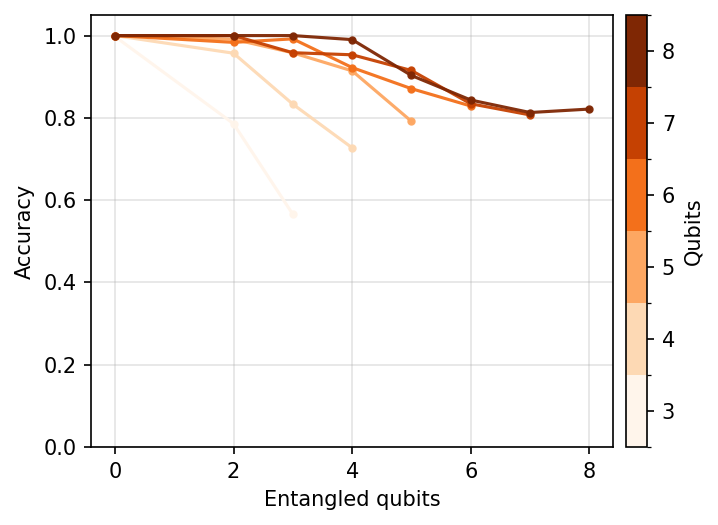

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Map qubits -> your dicts (keys=x, values=y)
"""
acc_by_qubits = {
    3: q3_acc_per_entanglement,
    4: q4_acc_per_entanglement,
    5: q5_acc_per_entanglement,
    6: q6_acc_per_entanglement,
    7: q7_acc_per_entanglement,
    8: q8_acc_per_entanglement,
}
"""

fig, ax = plt.subplots(figsize=(5, 3.6), dpi=150)

# ---- Discrete colormap for integer qubits (stepped colorbar) ----
qubits = np.array(sorted(acc_by_qubits.keys()))
cmap = plt.get_cmap("Oranges", len(qubits)) # quantized version of Oranges

# boundaries between integers -> discrete steps
bounds = np.arange(qubits.min() - 0.5, qubits.max() + 1.5, 1.0)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for q, acc in acc_by_qubits.items():
    # Ensure x is sorted (dict order may not match numeric order)
    xs = sorted(acc.keys())
    ys = [acc[x] for x in xs]

    ax.plot(
        xs, ys,
        marker="o", markersize=3,
        # linewidth=2,
        color=cmap(norm(q)),
        alpha=0.95,
    )

# ---- Stepped colorbar labeled "Qubits" ----
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02, ticks=qubits, boundaries=bounds)
cbar.set_label("Qubits")

# Styling to resemble the example
ax.set_ylim(0, 1.05)
ax.grid(True, alpha=0.35)

ax.set_ylabel("Accuracy")
ax.set_xlabel("Entangled qubits")

plt.tight_layout()
plt.show()


In [ ]:
import dill as pkl

for n_qubits, q_results in enumerate([[q3_valid_indices, q3_target_srvs, q3_predicted_srvs, q3_srv_exact_match_rate, q3_acc_per_entanglement],
                                      [q4_valid_indices, q4_target_srvs, q4_predicted_srvs, q4_srv_exact_match_rate, q4_acc_per_entanglement],
                                      [q5_valid_indices, q5_target_srvs, q5_predicted_srvs, q5_srv_exact_match_rate, q5_acc_per_entanglement],
                                      [q6_valid_indices, q6_target_srvs, q6_predicted_srvs, q6_srv_exact_match_rate, q6_acc_per_entanglement],
                                      [q7_valid_indices, q7_target_srvs, q7_predicted_srvs, q7_srv_exact_match_rate, q7_acc_per_entanglement],
                                      [q8_valid_indices, q8_target_srvs, q8_predicted_srvs, q8_srv_exact_match_rate, q8_acc_per_entanglement]]):

    path = f"./results/quditkit_dataset/q{n_qubits + 3}"
    os.makedirs(path, exist_ok=True)

    with open(os.path.join(path, f"q{n_qubits + 3}_valid_indices.pkl"), "wb") as f:
        pkl.dump(q_results[0], f)

    store_tensor(q_results[1], os.path.join(path, f"q{n_qubits + 3}_target_srvs.pt"))
    store_tensor(q_results[2], os.path.join(path, f"q{n_qubits + 3}_predicted_srvs.pt"))

    with open(os.path.join(path, f"q{n_qubits + 3}_srv_exact_match_rate.pkl"), "wb") as f:
        pkl.dump(q_results[3], f)

    with open(os.path.join(path, f"q{n_qubits + 3}_acc_per_entanglement.pkl"), "wb") as f:
        pkl.dump(q_results[4], f)
